### plotting figures and some stats for the neanderthal predixcan manuscript

#### load libraries, standard info

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(fmsb)
library(PheWAS)

abbreviations <- c("ADPS","ESPMC","ABPV","ESPMS","ADRNLG","HRTAA","BRNACC","HRTLV","ARTA","LIVER","ARTC","LUNG","ARTT","MSCSK","BRNCDT","NERVET","BRNCHB","OVARY",
                   "BRNCHA","PNCS","BRNCTX","PTTY","BRNFCTX","PRSTT","BRNHPP","SKINNS","BRNHPT","SKINS","BRNNCC","SMINT","BRNPTM","SPLEEN","BREAST","STMCH","TESTIS",
                   "FIBS","THYROID","CLNS","UTERUS","CLNT","VAGINA","ESPGJ","WHLBLD")
names(abbreviations) <- c("adipose_subcutaneous","esophagus_mucosa","adipose_visceral_omentum","esophagus_muscularis",
        "adrenal_gland","heart_atrial_appendage","anterior_cingulate_cortex","left_ventricle","artery_aorta","liver","artery_coronary",
        "lung","artery_tibial","muscle_skeletal","brain_caudate_basal_ganglia","nerve_tibial","brain_cerebellar_hemisphere","ovary",                                
        "brain_cerebellum","pancreas","brain_cortex","pituitary","brain_frontal_cortex","prostate","brain_hippocampus","skin_nosun_suprapubic","brain_hypothalamus",
        "skin_sun_lower_leg","brain_nucleus_accumbens_basal_ganglia","small_intestine_terminal_ileum","brain_putamen_basal_ganglia",
        "spleen","breast_mammary_tissue","stomach","testis","cells_transformed_fibroblasts","thyroid","colon_sigmoid","uterus",
        "colon_transverse","vagina","esophagus_gastroesophageal_junction","whole_blood")



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: parallel


#### plot counts of DR genes per tissue, filtered for Non-Introgressed genes

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)
Joining, by = "gene_id"


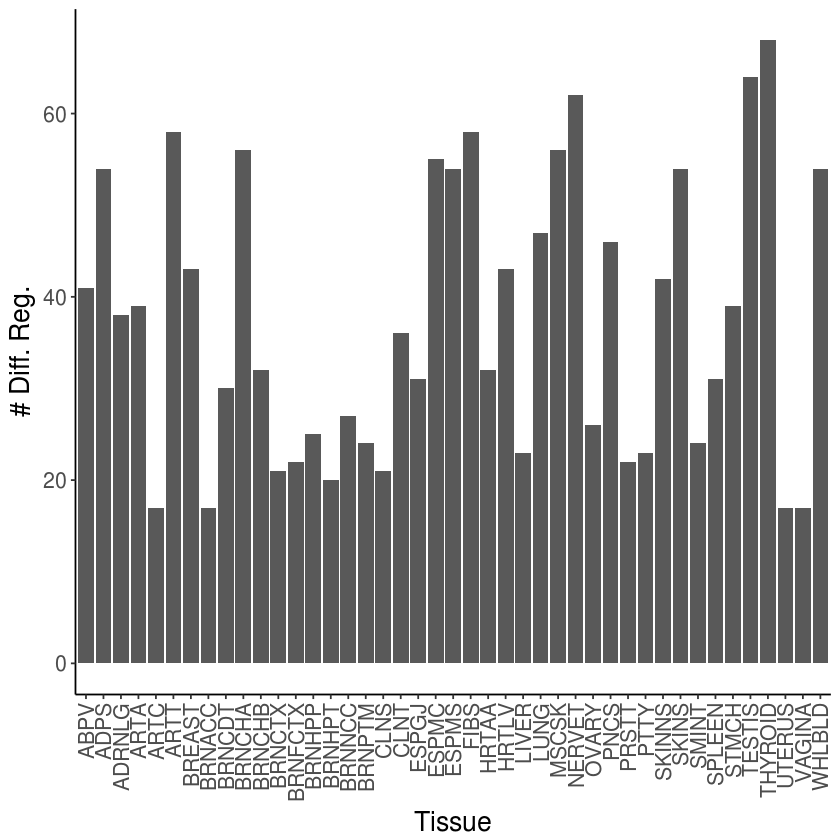

In [3]:
p_file_path <- "data/altai_original_pvalues_2sided.txt"
intro_path <- "data/altai_intro_genes.txt"

p_mat <- read_delim(p_file_path, "\t", escape_double = FALSE, trim_ws = TRUE)
intro <- read_csv(intro_path, col_names = FALSE)
intro$gene_id <- intro$X1
intro$X1 <- NULL
p_mat <- anti_join(p_mat, intro)
counts <- c()
tiss <- c()
for (i in 2:ncol(p_mat)) {
tiss <- c(tiss, names(p_mat[i]))
counts <- c(counts,nrow(p_mat[!is.na(p_mat[,i]) & p_mat[,i] == 0,]))
}
out <- data.frame(num = counts, Tissue = tiss)
for (i in 1:nrow(out)) {
out$abb[i] <- abbreviations[as.character(out$Tissue[i])]
}
ggplot(out, aes(x = abb, y = num)) + geom_bar(stat="identity") + labs(x="Tissue",y="# Diff. Reg.") + 
theme_classic() + theme(text = element_text(size=16), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))


#### raw expression comparisons for non-introgressed genes based on introgression status

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Joining, by = "X1"
Warning message:
“Column `X1` joining factor and character vector, coercing into character vector”Joining, by = "X1"
Joining, by = "X1"
Joining, by = "X1"
Joining, by = "gene_id"
Joining, by = "gene_id"
Warning message:
“Column `gene_id` joining character vector and factor, coercing into character vector”

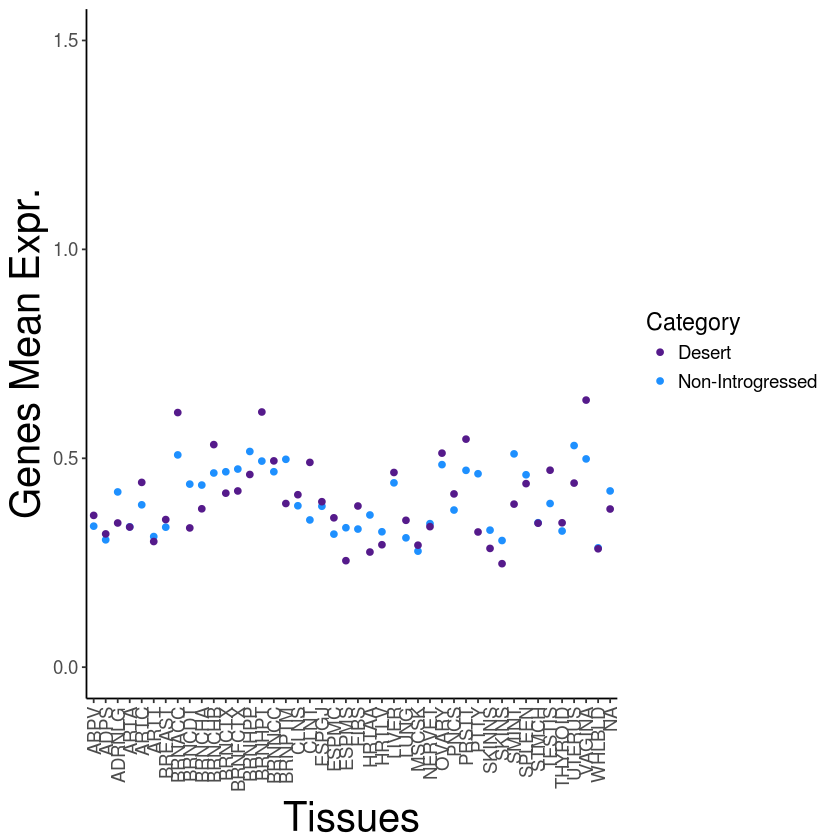

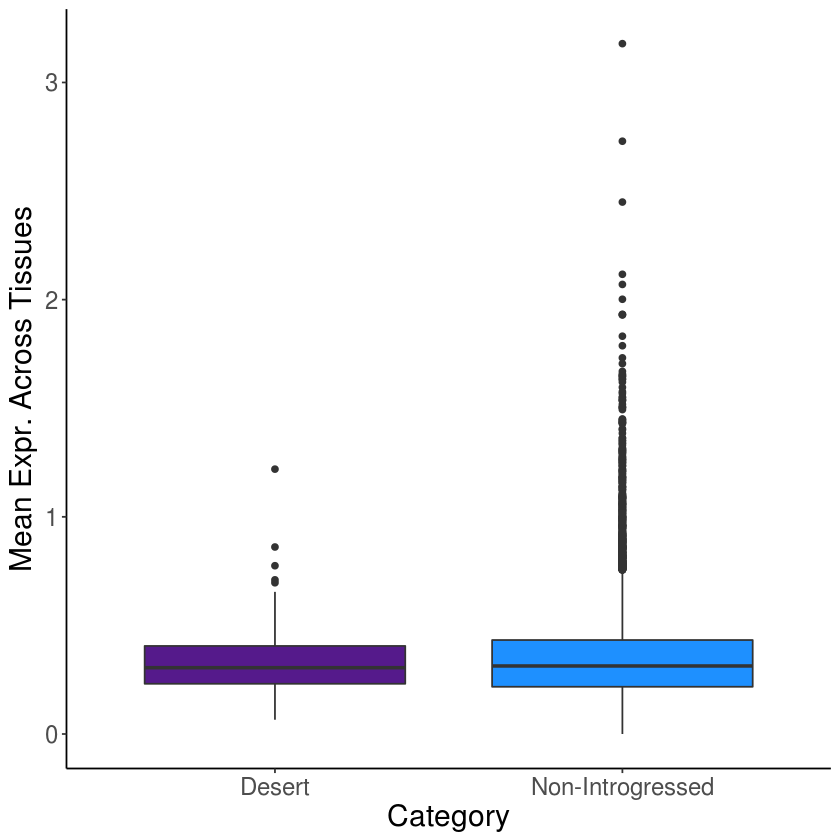

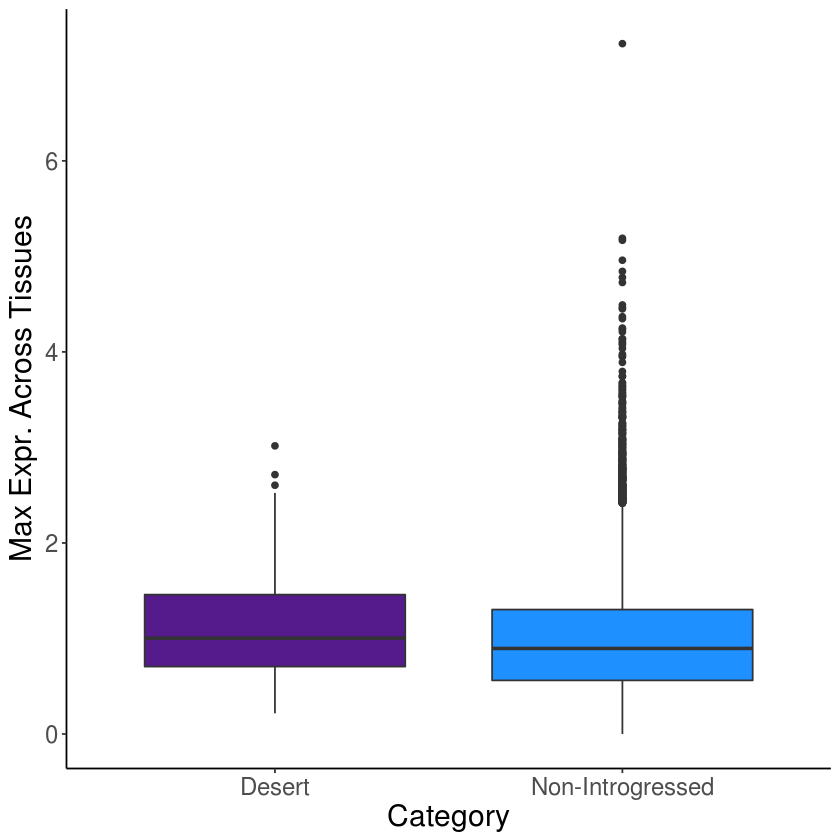

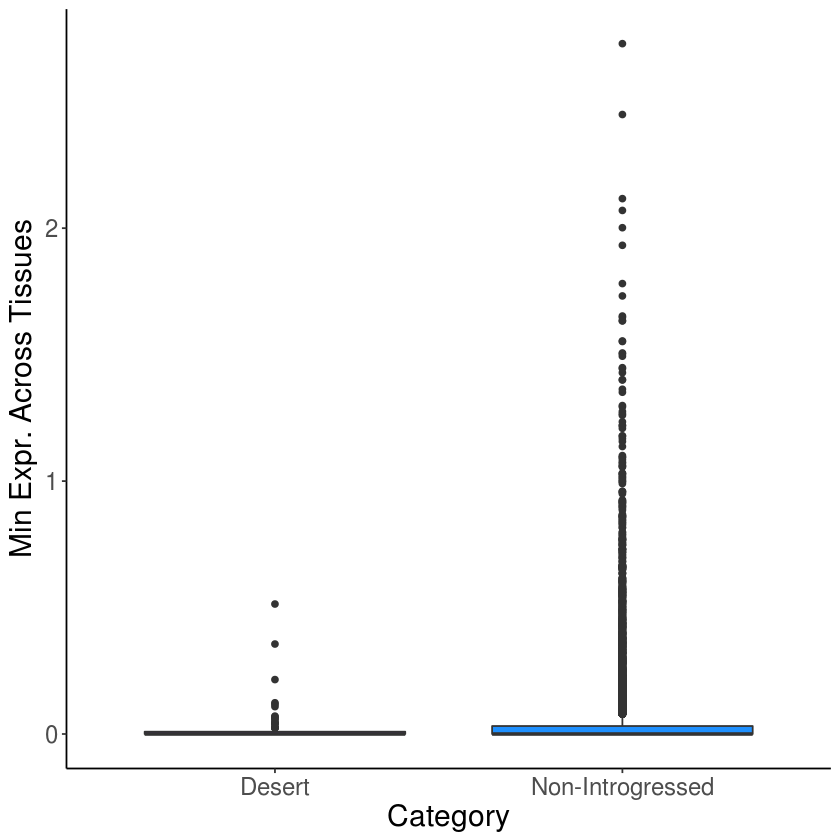

In [4]:
desert_file <- "data/altai_desert_genes.txt"
intro_file <- "data/altai_intro_genes.txt"
excl_file <- "data/altai_original_missingModels.txt"
pred_file <- "data/altai_original_predExp.txt"

desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
excl_genes <- read_delim(excl_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
altai_all <- read_delim(pred_file, "\t", escape_double = FALSE, trim_ws = TRUE)

for (i in 1:nrow(intro_genes)) {
    intro_genes[i,1] <- strsplit(intro_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(desert_genes)) {
    desert_genes[i,1] <- strsplit(desert_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(altai_all)) {
    altai_all[i,1] <- strsplit(altai_all[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(excl_genes)) {
    excl_genes[i,1] <- strsplit(excl_genes[i,1][[1]],"[.]")[[1]][1]
}

all_genes <- data.frame(X1 =altai_all$gene_id)
all_genes <- anti_join(all_genes,excl_genes)
desert_genes <- anti_join(desert_genes,excl_genes)
intro_genes <- anti_join(intro_genes,excl_genes)
desert_genes <- anti_join(desert_genes,intro_genes)

rows_to_remove <- c()
for (i in 1:nrow(all_genes)) {
    if (all_genes$X1[i] %in% desert_genes$X1 || all_genes$X1[i] %in% intro_genes$X1) {
      rows_to_remove <- c(rows_to_remove,i)
    }
}
control_genes <- data.frame(gene_id = all_genes[-rows_to_remove,])
desert_genes$gene_id <- desert_genes$X1
desert_genes$X1 <- NULL
remove(all_genes)

altai_all$count <- ncol(altai_all)-1
altai_all$mean <-  0
altai_all$max <- 0
altai_all$min <- 100
for (i in 2:(ncol(altai_all)-4)) {
    for (j in 1:nrow(altai_all)) {
      if (is.na(altai_all[j,i])) {
        altai_all$count[j] <- altai_all$count[j] -1
      } else {
        altai_all$mean[j] <- altai_all$mean[j] + abs(altai_all[j,i][[1]])
        if (abs(altai_all[j,i][[1]]) > altai_all$max[j]) { altai_all$max[j] <- abs(altai_all[j,i][[1]])}
        if (abs(altai_all[j,i][[1]])< altai_all$min[j]) {altai_all$min[j] <- abs(altai_all[j,i][[1]])}
      }
    }
}
altai_all$mean <- altai_all$mean/altai_all$count
altai_all$count <- NULL
desert_genes <- inner_join(altai_all,desert_genes)
control_genes <- inner_join(altai_all,control_genes)
remove(altai_all)

p_desert <- c()
mean_desert <- c()
mean_control <- c()
n <- c()
for (col in 2:(ncol(control_genes)-3)) {
    tmp <- data.frame(Expression = c(control_genes[,col][[1]],desert_genes[,col][[1]]),
                      Category = c(rep("Non-Introgressed",nrow(control_genes)), rep("Desert", nrow(desert_genes))))
    n <- c(n,names(control_genes)[col])
    #print(names(control_genes)[col])
    #print("Non-Intro Mean = ")
    #print(mean(abs(tmp[tmp$Category == "Non-Intro",]$Expression), na.rm = T))
    mean_control <- c(mean_control,mean(abs(tmp[tmp$Category == "Non-Introgressed",]$Expression), na.rm = T))
    new <- wilcox.test(abs(tmp[tmp$Category == "Desert",]$Expression), abs(tmp[tmp$Category == "Non-Introgressed",]$Expression))$p.value
    p_desert <- c(p_desert,new)
    #print("Desert mean = ")
    #print(mean(abs(tmp[tmp$Category == "Desert",]$Expression), na.rm = T))
    mean_desert <- c(mean_desert,mean(abs(tmp[tmp$Category == "Desert",]$Expression), na.rm = T))
    #print("p = ")
    #print(new)
}
remove(tmp)
p_values <- data.frame(Tissue = n,control_mean = mean_control,desert_mean = mean_desert,desert_p = p_desert)
p_values <- p_values[order(p_values$desert_p),]
p_values$desert_fdr <- "FAIL"
for (i in 1:nrow(p_values)) {
    p_values$desert_q[i] <- i*0.05/nrow(p_values)
    if (p_values$desert_p[i] < p_values$desert_q[i]) {p_values$desert_fdr[i] <- "PASS"}
}

means <- data.frame(tissue = rep(p_values$Tissue,2), mean = c(p_values$control_mean,p_values$desert_mean),
                  Category = c(rep("Non-Introgressed",nrow(p_values)), rep("Desert", nrow(p_values))))
for (i in 1:nrow(means)) {
    means$abb[i] <- abbreviations[as.character(means$tissue[i])]
}
ggplot(means,aes(x=abb,y=mean,color=Category)) + geom_point() + ylim(0,1.5) + theme_classic() + 
scale_colour_manual(values=c("purple4","dodgerblue"))+
labs(x="Tissues",y="Genes Mean Expr.") + theme(text = element_text(size=14),axis.title.x= element_text(size = 24),axis.text.x=element_text(angle = 90,
                                                                                                  vjust = 0.5, hjust=1),axis.title.y=element_text(size = 24))

plots <- data.frame(Mean = c(control_genes$mean,desert_genes$mean), Max = c(control_genes$max,desert_genes$max),
                  Min = c(control_genes$min,desert_genes$min),
                  Category = c(rep("Non-Introgressed",nrow(control_genes)), rep("Desert", nrow(desert_genes))))

#print("Desert Mean:")
#print(wilcox.test(plots[plots$Category == "Desert",]$Mean,plots[plots$Category == "Non-Intro",]$Mean)$p.value)
#print("Desert Max:")
#print(wilcox.test(plots[plots$Category == "Desert",]$Max,plots[plots$Category == "Non-Intro",]$Max)$p.value)
#print("Desert Min:")
#print(wilcox.test(plots[plots$Category == "Desert",]$Min,plots[plots$Category == "Non-Intro",]$Min)$p.value)
ggplot(plots,aes(x=Category,y=Mean,fill=Category)) + geom_boxplot()+ theme_classic() + 
scale_fill_manual(values=c("purple4","dodgerblue"))+
labs(y="Mean Expr. Across Tissues") + theme(text = element_text(size=18),legend.position = "none")
ggplot(plots,aes(x=Category,y=Max,fill=Category)) + geom_boxplot()+ theme_classic() + 
scale_fill_manual(values=c("purple4","dodgerblue"))+
labs(y="Max Expr. Across Tissues") +theme(text = element_text(size=18),legend.position = "none")
ggplot(plots,aes(x=Category,y=Min,fill=Category)) + geom_boxplot()+ theme_classic() + 
scale_fill_manual(values=c("purple4","dodgerblue"))+
labs(y="Min Expr. Across Tissues") +theme(text = element_text(size=18),legend.position = "none")

#### groups phenotypes and counts associations per group

In [ ]:
top_genes <- "data/altai_dr_phewas.txt"

full_assoc_nean <- read_delim(top_genes, "\t", escape_double = FALSE, trim_ws = TRUE)
data(pheinfo)
full_assoc_nean$group <- "none"
full_assoc_nean <- full_assoc_nean[((full_assoc_nean$`p-value` < 0.00001) & (full_assoc_nean$`p-value` > 0)),]
for (row in 1:nrow(pheinfo)) {
    phecode <- pheinfo$phecode[row]
    if (startsWith(phecode, "00")) {phecode <- substr(phecode,3,nchar(phecode))}
    if (startsWith(phecode, "0")) {phecode <- substr(phecode,2,nchar(phecode))}
    if (paste("X",phecode,sep="") %in% full_assoc_nean$phecode) {
      full_assoc_nean[full_assoc_nean$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
}
full_assoc_nean$sum <- 1
counts <- full_assoc_nean %>% group_by(group) %>% summarise(sum = sum(sum))
counts$t_sum <- 0
for (row in 1:nrow(counts)) {
    counts$t_sum[row] <- nrow(pheinfo[pheinfo$group == counts$group[row],])
}
counts$prop <- counts$sum/counts$t_sum
ggplot(counts,aes(x=reorder(group,prop),y=prop)) + ylab("Number of Assoc./Phenotype") + xlab("Category") + theme_classic() + 
theme(legend.position = "none",text = element_text(size=18),axis.text.x = element_text(angle = 90,vjust=0.5,
           hjust=1),axis.text.y = element_text(face = "bold")) + geom_bar(stat="identity")

#### Odds Ratios for DR genes being associated with a particular phenotype group

Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)
Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)
Parsed with column specification:
cols(
  `#names` = col_character()
)
Joining, by = "gene"
Joining, by = "gene"


           Disease Nondisease Total
Exposed         27        568   595
Nonexposed      73       1833  1906
Total          100       2401  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         27        568   595
Nonexposed      73       1833  1906
Total          100       2401  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         27        568   595
Nonexposed      73       1833  1906
Total          100       2401  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         34        561   595
Nonexposed     128       1778  1906
Total          162       2339  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         34        561   595
Nonexposed     128       1778  1906
Total          162       2339  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         34        561   595
Nonexposed     128       1778  1906
Total          162       2339  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         28        567   595
Nonexposed     153       1753  1906
Total          181       2320  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         28        567   595
Nonexposed     153       1753  1906
Total          181       2320  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         28        567   595
Nonexposed     153       1753  1906
Total          181       2320  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         46        549   595
Nonexposed     150       1756  1906
Total          196       2305  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         46        549   595
Nonexposed     150       1756  1906
Total          196       2305  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         46        549   595
Nonexposed     150       1756  1906
Total          196       2305  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         53        542   595
Nonexposed     135       1771  1906
Total          188       2313  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         53        542   595
Nonexposed     135       1771  1906
Total          188       2313  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         53        542   595
Nonexposed     135       1771  1906
Total          188       2313  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         64        531   595
Nonexposed     210       1696  1906
Total          274       2227  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         64        531   595
Nonexposed     210       1696  1906
Total          274       2227  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         64        531   595
Nonexposed     210       1696  1906
Total          274       2227  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         54        541   595
Nonexposed     131       1775  1906
Total          185       2316  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         54        541   595
Nonexposed     131       1775  1906
Total          185       2316  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         54        541   595
Nonexposed     131       1775  1906
Total          185       2316  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         29        566   595
Nonexposed      74       1832  1906
Total          103       2398  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         29        566   595
Nonexposed      74       1832  1906
Total          103       2398  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         29        566   595
Nonexposed      74       1832  1906
Total          103       2398  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         12        583   595
Nonexposed      57       1849  1906
Total           69       2432  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         12        583   595
Nonexposed      57       1849  1906
Total           69       2432  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         12        583   595
Nonexposed      57       1849  1906
Total           69       2432  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         81        514   595
Nonexposed     226       1680  1906
Total          307       2194  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         81        514   595
Nonexposed     226       1680  1906
Total          307       2194  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         81        514   595
Nonexposed     226       1680  1906
Total          307       2194  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         20        575   595
Nonexposed      99       1807  1906
Total          119       2382  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         20        575   595
Nonexposed      99       1807  1906
Total          119       2382  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         20        575   595
Nonexposed      99       1807  1906
Total          119       2382  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         31        564   595
Nonexposed     123       1783  1906
Total          154       2347  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         31        564   595
Nonexposed     123       1783  1906
Total          154       2347  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         31        564   595
Nonexposed     123       1783  1906
Total          154       2347  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed          4        591   595
Nonexposed      28       1878  1906
Total           32       2469  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed          4        591   595
Nonexposed      28       1878  1906
Total           32       2469  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed          4        591   595
Nonexposed      28       1878  1906
Total           32       2469  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         49        546   595
Nonexposed     150       1756  1906
Total          199       2302  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         49        546   595
Nonexposed     150       1756  1906
Total          199       2302  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         49        546   595
Nonexposed     150       1756  1906
Total          199       2302  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         36        559   595
Nonexposed      75       1831  1906
Total          111       2390  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         36        559   595
Nonexposed      75       1831  1906
Total          111       2390  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         36        559   595
Nonexposed      75       1831  1906
Total          111       2390  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed          9        586   595
Nonexposed      44       1862  1906
Total           53       2448  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed          9        586   595
Nonexposed      44       1862  1906
Total           53       2448  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed          9        586   595
Nonexposed      44       1862  1906
Total           53       2448  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         18        577   595
Nonexposed      50       1856  1906
Total           68       2433  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         18        577   595
Nonexposed      50       1856  1906
Total           68       2433  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         18        577   595
Nonexposed      50       1856  1906
Total           68       2433  2501


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

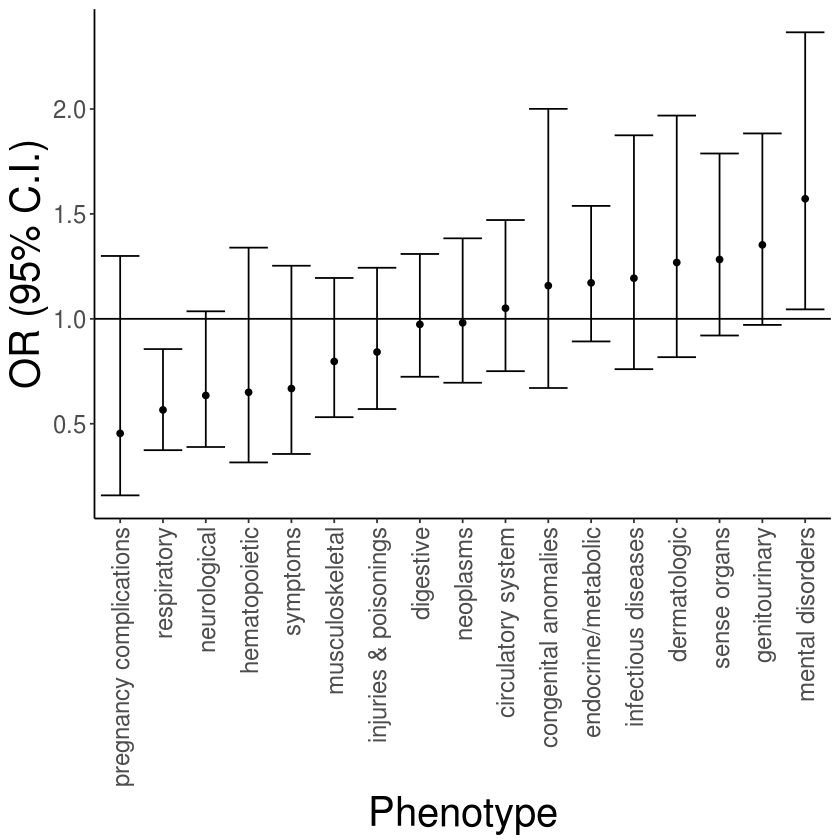

In [18]:
top_genes <- "data/altai_dr_phewas.txt"
control <- "data/altai_control_phewas.txt"

data(pheinfo)
full_assoc_nean <- read_delim(top_genes, "\t", escape_double = FALSE, trim_ws = TRUE)
full_control <- read_delim(control, "\t", escape_double = FALSE, trim_ws = TRUE)

## if filtering by introgression status of genes:
intro_genes <- read_csv("data/altai_intro_genes_names.txt")
intro_genes$gene <- intro_genes$`#names`
intro_genes$`#names` <- NULL

# get introgressed genes
#full_assoc_nean <- inner_join(full_assoc_nean, intro_genes)
#full_control <- inner_join(full_control, intro_genes)
# get non-Introgressed genes
full_assoc_nean <- anti_join(full_assoc_nean, intro_genes)
full_control <- anti_join(full_control, intro_genes)

full_assoc_nean$group <- "none"
full_assoc_nean <- full_assoc_nean[((full_assoc_nean$`p-value` < 0.00001) & (full_assoc_nean$`p-value` > 0)),]
full_control$group <- "none"
full_control <- full_control[((full_control$`p-value` < 0.00001) & (full_control$`p-value` > 0)),]
for (row in 1:nrow(pheinfo)) {
    phecode <- pheinfo$phecode[row]
    if (startsWith(phecode, "00")) {phecode <- substr(phecode,3,nchar(phecode))}
    if (startsWith(phecode, "0")) {phecode <- substr(phecode,2,nchar(phecode))}
    if (paste("X",phecode,sep="") %in% full_control$phecode) {
      full_control[full_control$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
    if (paste("X",phecode,sep="") %in% full_assoc_nean$phecode) {
      full_assoc_nean[full_assoc_nean$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
}
ORs <- data.frame(phenotypes = unique(full_assoc_nean$group), ors = 0,p = 0)
for (row in 1:nrow(ORs)) {
    phen_nean <- nrow(full_assoc_nean[full_assoc_nean$group == ORs$phenotypes[row],])
    phen_control <- nrow(full_control[full_control$group == ORs$phenotypes[row],])
    norm_nean <- nrow(full_assoc_nean[full_assoc_nean$group != ORs$phenotypes[row],])
    norm_control <- nrow(full_control[full_control$group != ORs$phenotypes[row],])
    ORs$ors[row] <- oddsratio(phen_nean,phen_control,norm_nean,norm_control)$estimate
    ORs$low[row] <- oddsratio(phen_nean,phen_control,norm_nean,norm_control)$conf.int[1]
    ORs$high[row] <- oddsratio(phen_nean,phen_control,norm_nean,norm_control)$conf.int[2]
}
ggplot(ORs,aes(x=reorder(phenotypes,ors),y=ors)) + geom_point() + theme_classic() +
theme(text = element_text(size=18),axis.title.x= element_text(size = 24),axis.text.x=element_text(angle = 90,vjust = 0.5,hjust=1),axis.title.y=element_text(size = 24)) + geom_errorbar(aes(ymin = low,ymax = high)) + 
geom_hline(yintercept=1,color = "black")+ xlab("Phenotype") + ylab("OR (95% C.I.)")

#### Counts of Derived SNPs

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  `#gene` = col_character(),
  snp_count = col_integer()
)
Warning message:
“Unknown or uninitialised column: '#gene'.”Warning message:
“Unknown or uninitialised column: '#gene'.”

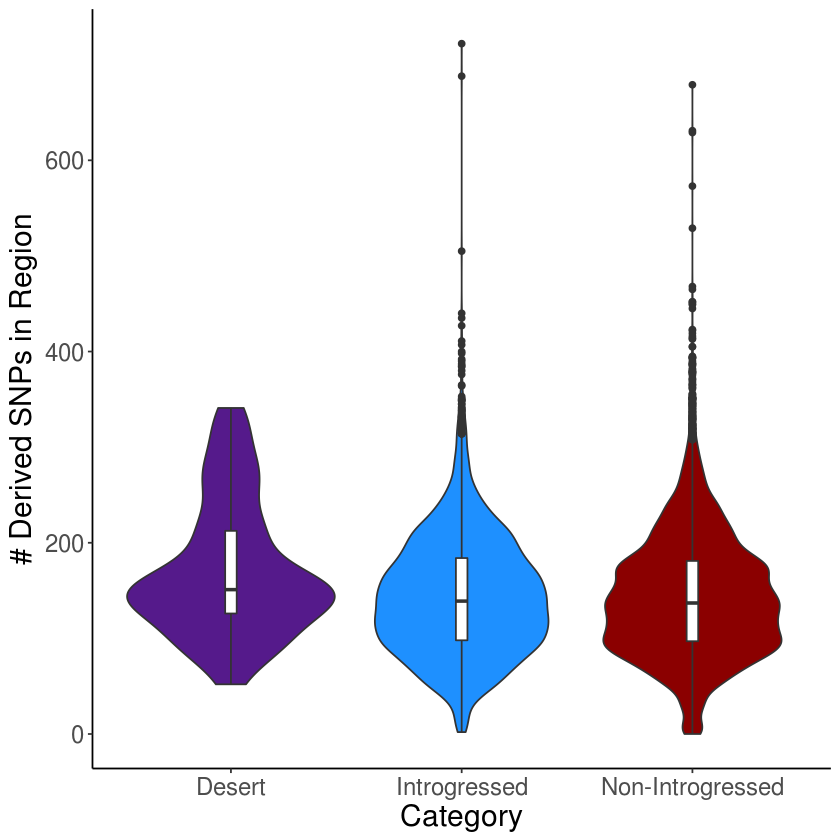

In [52]:
der_file <- "data/gene-dersnp_intersection.txt"
desert_file <- "data/altai_desert_genes.txt"
intro_file <- "data/altai_intro_genes.txt"

desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
der_snps <- read_delim(der_file,"\t", escape_double = FALSE, col_names = TRUE, trim_ws = TRUE)

for (i in 1:nrow(desert_genes)) {
    desert_genes$`#gene`[i] <- strsplit(desert_genes$X1[i],"\\.")[[1]][1]
}
for (i in 1:nrow(intro_genes)) {
    intro_genes$`#gene`[i] <- strsplit(intro_genes$X1[i],"\\.")[[1]][1]
}
der_snps$Category <- "Non-Introgressed"
for (i in 1:nrow(der_snps)){
    if (der_snps$`#gene`[i] %in% intro_genes$`#gene`) {
        der_snps$Category[i] <- "Introgressed"
    }else {if(der_snps$`#gene`[i] %in% desert_genes$`#gene`) {
        der_snps$Category[i] <- "Desert"
    }}
}
ggplot(der_snps,aes(x=Category,y=snp_count,fill=Category)) + geom_violin()+
  geom_boxplot(width=0.05,fill="white") +theme_classic() + scale_fill_manual(values=c("purple4","dodgerblue","darkred"))+
labs(y="# Derived SNPs in Region") +theme(text = element_text(size=18),legend.position = "none")